<a href="https://colab.research.google.com/github/siddharth7739/EDA_ON_US_ACCIDENTS/blob/main/USA_Accidents_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA on USA Accidents Data<br>
Dataset used - https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv("/content/Data/USA_ACCIDENTS.csv")

# # Understanding Your Data
<ol>
  <li>How big is the data?</li>
  <li>how does the data look?</li>
  <li>what is the type of data?</li>
  <li>Missing value</li>
  <li>How does numerical value look like</li>
  <li>How many duplicate value are present & if yes drop duplicate</li>
  <li>Correlation b/w column</li>
</ol>

In [69]:
#How big is the data?
df.shape

(7728394, 8)

In [71]:
#how does the data look?
df.head()

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
0,0,A-1,2016-02-08 05:46:00,39.865147,-84.058723,Dayton,OH,36.9
1,1,A-2,2016-02-08 06:07:59,39.928059,-82.831184,Reynoldsburg,OH,37.9
2,2,A-3,2016-02-08 06:49:27,39.063148,-84.032608,Williamsburg,OH,36.0
3,3,A-4,2016-02-08 07:23:34,39.747753,-84.205582,Dayton,OH,35.1
4,4,A-5,2016-02-08 07:39:07,39.627781,-84.188354,Dayton,OH,36.0


In [72]:
#what is the type of data?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   ID              object 
 2   Start_Time      object 
 3   Start_Lat       float64
 4   Start_Lng       float64
 5   City            object 
 6   State           object 
 7   Temperature(F)  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 471.7+ MB


In [73]:
#Missing value?
df.isnull().sum()

,0
Unnamed: 0,0
ID,0
Start_Time,0
Start_Lat,0
Start_Lng,0
City,253
State,0
Temperature(F),163853


In [74]:
#How does numerical value look like
df.describe()

,Unnamed: 0,Start_Lat,Start_Lng,Temperature(F)
count,7.728394e+06,7.728394e+06,7.728394e+06,7.564541e+06
mean,3.864196e+06,3.620119e+01,-9.470255e+01,6.166329e+01
std,2.230995e+06,5.076079e+00,1.739176e+01,1.901365e+01
min,0.000000e+00,2.455480e+01,-1.246238e+02,-8.900000e+01
25%,1.932098e+06,3.339963e+01,-1.172194e+02,4.900000e+01
50%,3.864196e+06,3.582397e+01,-8.776662e+01,6.400000e+01
75%,5.796295e+06,4.008496e+01,-8.035368e+01,7.600000e+01
max,7.728393e+06,4.900220e+01,-6.711317e+01,2.070000e+02


In [33]:
#How many duplicate value are present & if yes drop duplicate
df.duplicated().sum()

0

In [75]:
#Correlation b/w column
db_numeric = df.apply(pd.to_numeric, errors='coerce')
db_numeric.corr()

,Unnamed: 0,ID,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
Unnamed: 0,1.000000,NaN,NaN,0.032296,-0.083065,NaN,NaN,-0.051465
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Start_Lat,0.032296,NaN,NaN,1.000000,-0.067720,NaN,NaN,-0.443781
Start_Lng,-0.083065,NaN,NaN,-0.067720,1.000000,NaN,NaN,-0.010652
City,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature(F),-0.051465,NaN,NaN,-0.443781,-0.010652,NaN,NaN,1.000000


###Cities that have most of the accidents


In [77]:
city = df['City']
city_acc = df.City.value_counts()
major = city_acc[city_acc>50000]
major

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
Orlando,109733
Austin,97359
Raleigh,86079
Nashville,72930


###Pie Chart of the cities which have most accidents

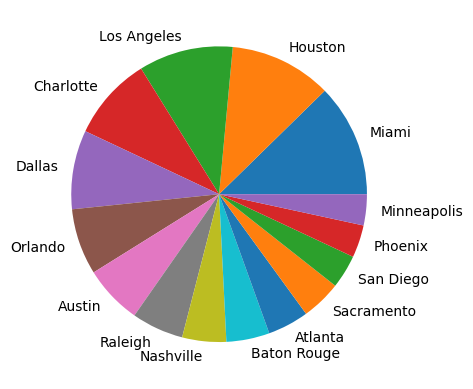

In [36]:
plt.pie(major,labels = major.index)
plt.show()

###Bar graph of the cities which have most accidents

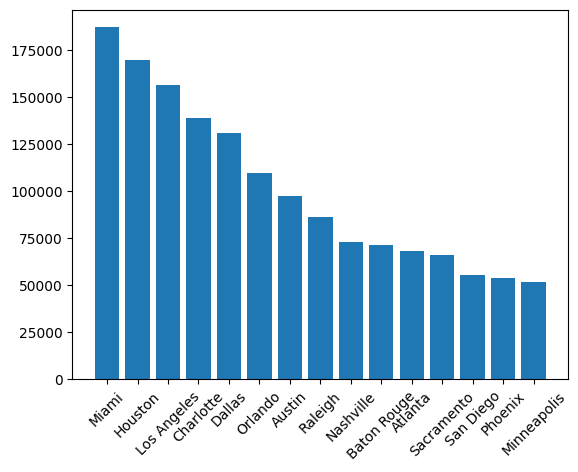

In [37]:
plt.bar(major.index,major)
plt.xticks(rotation=45)
plt.show()

###how many accidents happen every hour

In [79]:
date = pd.to_datetime(df.Start_Time,format='mixed', errors='coerce')
hour = date.dt.hour
hour.sort_values().value_counts(sort=False)

,count
Start_Time,
0,112378
1,97071
2,93227
3,83863
4,159852
5,228182
6,405837
7,587472
8,577576


###Bar graph of how many accidents happen every hour

<Axes: xlabel='Start_Time'>

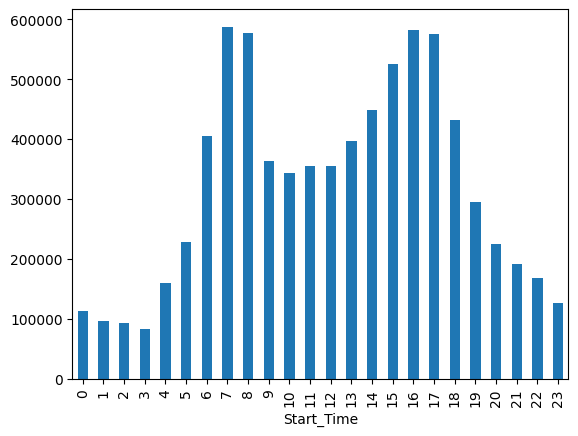

In [42]:
hour.sort_values().value_counts(sort=False).plot(kind='bar')

###How many accidents happen per year

<Axes: xlabel='Start_Time'>

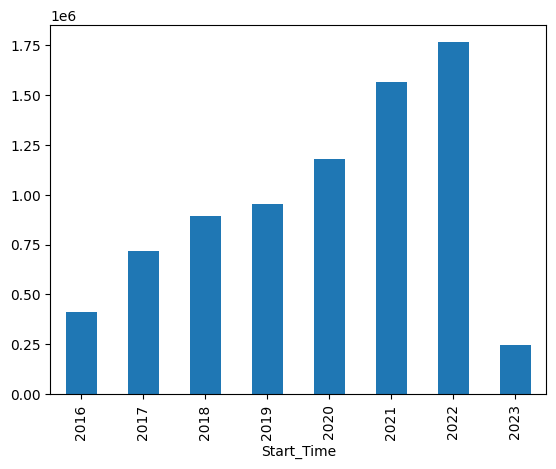

In [43]:
year = date.dt.year
year.sort_values().value_counts(sort=False).plot(kind='bar')

###How many accidents happen every day of the week

In [44]:
day = date.dt.day_of_week.map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
day.value_counts(sort=False)

,count
Start_Time,
Monday,1210921
Tuesday,1290929
Wednesday,1312389
Thursday,1316229
Friday,1366499
Saturday,668683
Sunday,562744


###Bar graph of how many accidents happen every day of the week

<Axes: xlabel='Start_Time'>

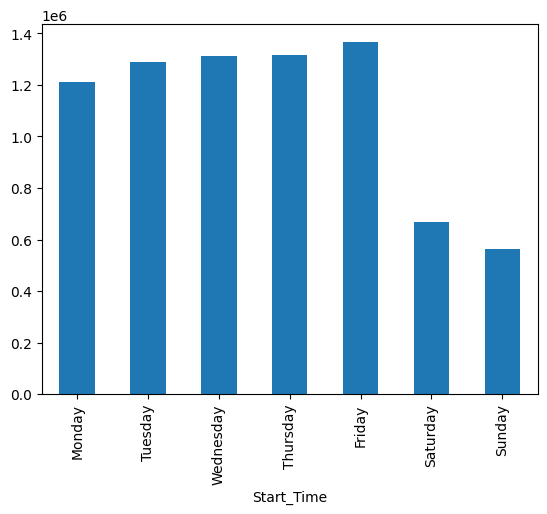

In [45]:
day.value_counts(sort=False).plot(kind='bar')

###Creating db a data frame with two columns city and time

In [82]:
db = df[['City','Start_Time']]#creating dataframe
db.Start_Time = pd.to_datetime(db.Start_Time,format='mixed', errors='coerce')#starttime beging converted to datetime format
db.Start_Time = db.Start_Time.dt.year#replacing the full timestamp with only hour

<ipython-input-82-960a49ce540c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.Start_Time = pd.to_datetime(db.Start_Time,format='mixed', errors='coerce')#starttime beging converted to datetime format
<ipython-input-82-960a49ce540c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db.Start_Time = db.Start_Time.dt.year#replacing the full timestamp with only hour


###Yearwise accidents in Miami

<Axes: xlabel='City,Start_Time'>

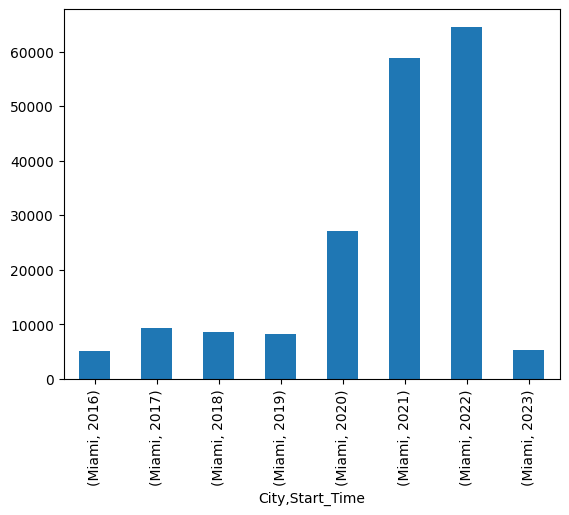

In [63]:
db[db.City == 'Miami'].value_counts(sort=False).plot(kind='bar')

###Yearwise accidents in Houston

<Axes: xlabel='City,Start_Time'>

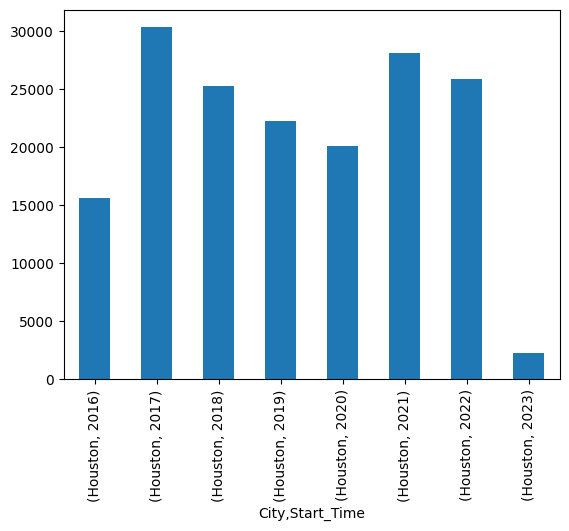

In [83]:
db[db.City == 'Houston'].value_counts(sort=False).plot(kind='bar')

###Yearwise accidents in Los Angeles

<Axes: xlabel='City,Start_Time'>

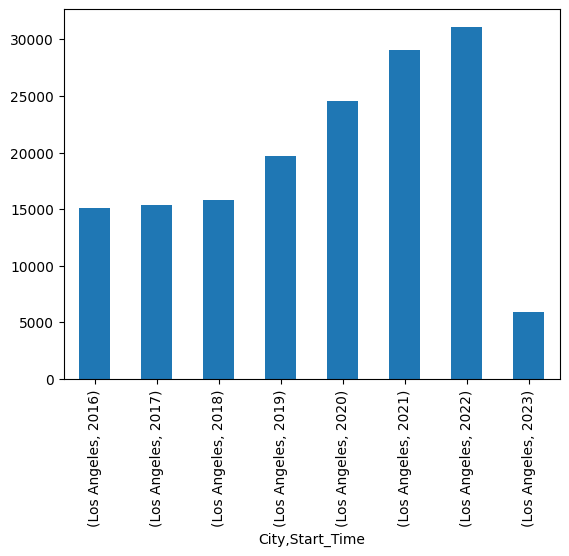

In [65]:
db[db.City == 'Los Angeles'].value_counts(sort=False).plot(kind='bar')

###Yearwise accidents in Charlotte



<Axes: xlabel='City,Start_Time'>

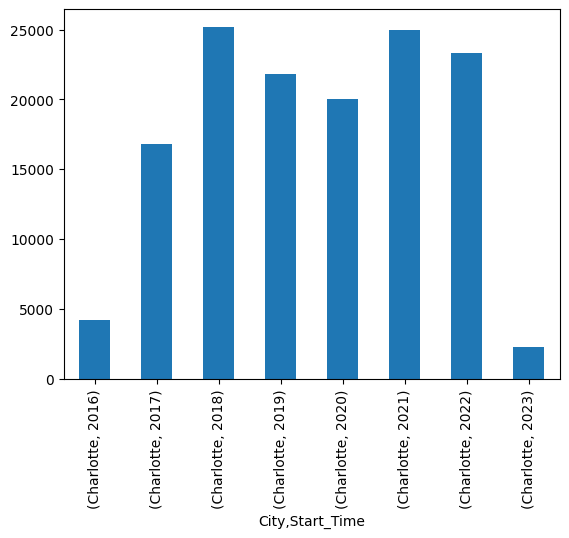

In [66]:
db[db.City == 'Charlotte'].value_counts(sort=False).plot(kind='bar')

###Yearwise accidents in Dallas

<Axes: xlabel='City,Start_Time'>

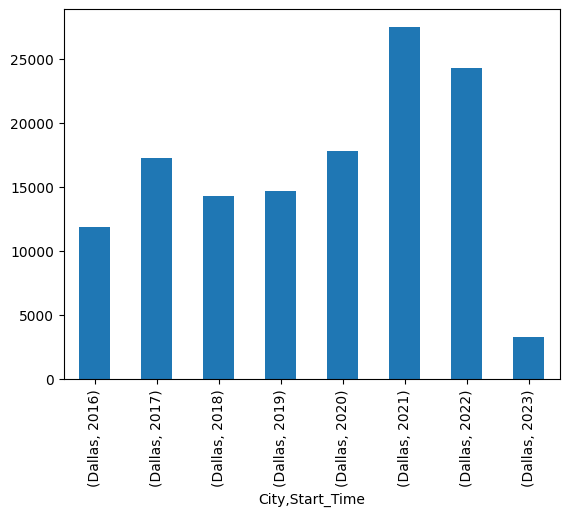

In [67]:
db[db.City == 'Dallas'].value_counts(sort=False).plot(kind='bar')

In [108]:
sns.set_theme(style="darkgrid")
high = city_acc[city_acc>5000]
high

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
...,...
Winter Park,5041
Bloomington,5023
Chino,5023


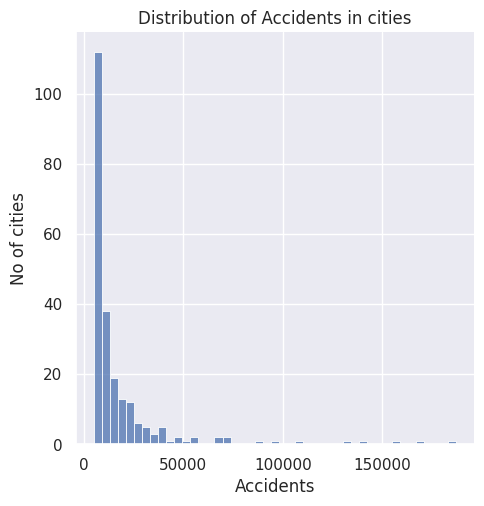

In [119]:
sns.displot(high)
plt.xlabel('Accidents')
plt.ylabel('No of cities')
plt.title('Distribution of Accidents in cities')

plt.show()

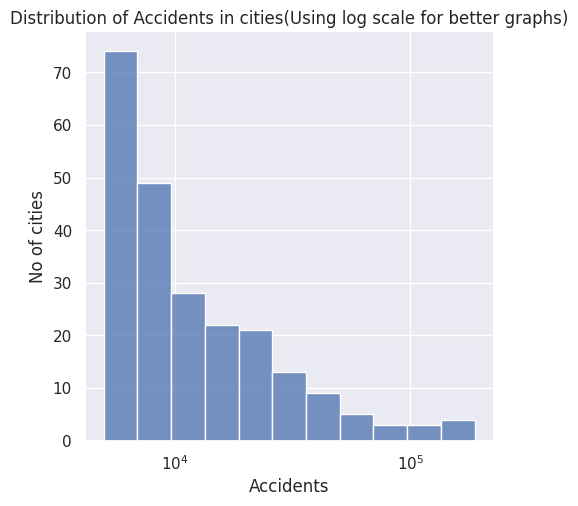

In [120]:
sns.displot(high,log_scale=True)
plt.xlabel('Accidents')
plt.ylabel('No of cities')
plt.title('Distribution of Accidents in cities(Using log scale for better graphs)')

plt.show()

In [121]:
low = city_acc[city_acc<5000]
low

,count
City,
Orangeburg,4980
Hampton,4953
Napa,4950
Centreville,4924
Boston,4890
...,...
Benkelman,1
Old Appleton,1
Wildrose,1


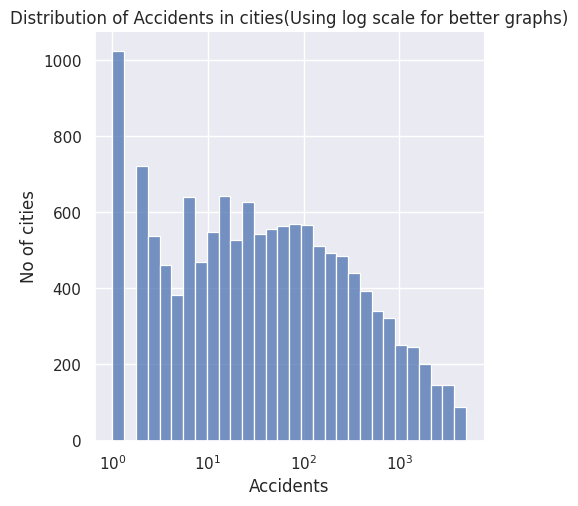

In [122]:
sns.displot(low,log_scale=True)
plt.xlabel('Accidents')
plt.ylabel('No of cities')
plt.title('Distribution of Accidents in cities(Using log scale for better graphs)')

plt.show()

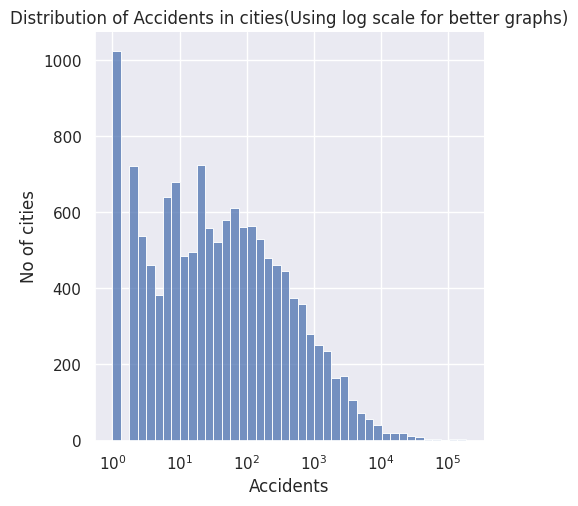

In [123]:
sns.displot(city_acc,log_scale=True)
plt.xlabel('Accidents')
plt.ylabel('No of cities')
plt.title('Distribution of Accidents in cities(Using log scale for better graphs)')

plt.show()